In [56]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [57]:

# Load MNIST dataset of handwritten digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

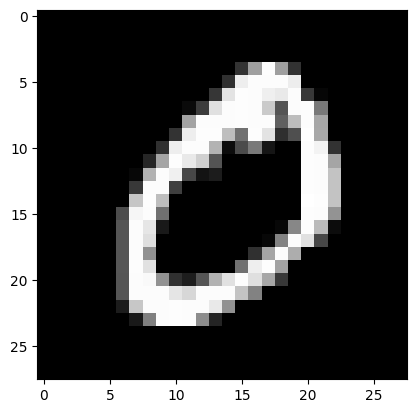

In [60]:
# Display the first training image
plt.imshow(x_train[1], cmap='gray')
plt.show()

In [61]:

# Print pixel values of the first image
print(x_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [62]:
# Display shapes of training and testing datasets
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [63]:
# Flatten 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [64]:
# Convert pixel values to float32 and normalize to [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [65]:
# Convert class labels to one-hot encoded vectors
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [66]:
# Build a neural network with two hidden layers and dropout
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


In [67]:
# Compile the model with loss, optimizer, and metric
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [68]:
# Train the model with specified batch size and epochs
batch_size = 128
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8621 - loss: 0.4455 - val_accuracy: 0.9695 - val_loss: 0.0954
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9657 - loss: 0.1113 - val_accuracy: 0.9746 - val_loss: 0.0838
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9771 - loss: 0.0767 - val_accuracy: 0.9804 - val_loss: 0.0640
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9825 - loss: 0.0565 - val_accuracy: 0.9755 - val_loss: 0.0774
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9844 - loss: 0.0471 - val_accuracy: 0.9820 - val_loss: 0.0626
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9875 - loss: 0.0380 - val_accuracy: 0.9783 - val_loss: 0.0762
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9892 - loss: 0.0345 - val_accuracy: 0.9826 - val_loss: 0.0657
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9906 - loss: 0.0293 - val_accur

In [69]:
# Evaluate the trained model on test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07539895176887512
Test accuracy: 0.9861000180244446


In [70]:
model.save('mnist_model.keras')

In [85]:
from tensorflow.keras.models import load_model

# Load the trained model in the new Keras format
model = load_model('mnist_model.keras')
model

<Sequential name=sequential_2, built=True>

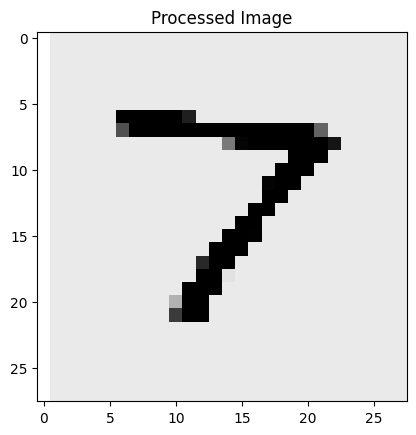

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted digit: 7


In [89]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

def predict_handwritten_digit(image_path):
    # Load the image (ensure it's 28x28 and grayscale)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image is loaded properly
    if img is None:
        print(f"Failed to load image at {image_path}")
        return

    # Resize image to 28x28 pixels
    img_resized = cv2.resize(img, (28, 28))

    # Invert colors if needed (MNIST images are black on white)
    img_resized = cv2.bitwise_not(img_resized)

    # Normalize and reshape the image
    img_resized = img_resized.astype('float32') / 255
    img_resized = img_resized.reshape(1, 784)  # Flatten the image

    # Debugging: Show the processed image before prediction
    plt.imshow(img_resized.reshape(28, 28), cmap='gray')
    plt.title("Processed Image")
    plt.show()

    # Load the trained model
    model = load_model('mnist_model.keras')

    # Make the prediction
    prediction = model.predict(img_resized)

    # Get the predicted digit (the class with the highest probability)
    predicted_digit = np.argmax(prediction)
    print(f'Predicted digit: {predicted_digit}')

# Example usage: Replace '9img.png' with the path to your own handwritten digit image
path = r"7img.png"
predict_handwritten_digit(path)
